# MACHINE LEARNING -STOCK PRICE PREDICTION

# Using long short term memory

In [ ]:
# Collecting the data that'll be read
# The Apple Stock data from 2017 will be used
# Using PIP to install modules and libraies not pre-installed

!pip3 install pandas_datareader

import pandas_datareader as pdr
import pandas as pd 
import numpy as pdf
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# Making a request to Tiingo obtain permission to import that data and use jt in a CSV


import requests

headers = {
        'Content-Type': 'application/json'
        }
requestResponse = requests.get("https://api.tiingo.com/api/test?token=9bca97348661f3ea4b238d695973184dfeba5fda",
                                    headers=headers)
print(requestResponse.json())

In [ ]:
# Retrieving data from Tiingo

data = pdr.get_data_tiingo('AAPL',api_key="9bca97348661f3ea4b238d695973184dfeba5fda")

In [ ]:

# Creating a csv file to  store Apple Stock Market Trends

data.to_csv('AAPL.csv')

In [ ]:
# Checking the top 5 rows of the data
data.head()

In [ ]:
# Checking the bottom rows of our data set

data.tail()

In [ ]:
data2= data.reset_index()['adjClose']

In [ ]:
data2[1220:]

In [ ]:
data.shape

In [ ]:
data2.shape

In [ ]:
plt.plot(data2)
# Close of market stock price trend from 2017 to 2022 September

In [ ]:
# LSTM is sensitive to scale of data, implemmenting MinMaxScaler for this issue

In [ ]:
import sys
sys.path

sys.executable

In [ ]:
!pip3 install scikit-learn

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data2= scaler.fit_transform(pdf.array(data2).reshape(-1,1))

In [ ]:
data2

In [ ]:
# Splitting the dataset into train and test splits

training_size =int(len(data2)*0.65)
test_size =len(data2)- training_size
train_data,test_data=data2[0:training_size,:],data2[training_size:len(data2), :1]

In [ ]:
training_size, test_size

In [ ]:
len(train_data)

In [ ]:
len(test_data)

In [ ]:
# create an array of values into dataset matrix
def create_dataset(dataset,time_step =1):
    dataX,dataY =[],[]
    for i in range(len(dataset)-time_step-1):
        a= dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return pdf.array(dataX),pdf.array(dataY)

In [ ]:
# Reshaping into x=t ,t+1,t+2,t+3  and y=t+4

time_step =100
x_train,y_train =create_dataset(train_data,time_step)
x_test,ytest=create_dataset(test_data,time_step)

In [ ]:
x_train.shape

# CREATING THE LSTM MODEL

In [ ]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test =x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [105]:
# stacked lSTM model
!pip3 install tensorflow

import tensorflow as tf

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [108]:
model= Sequential()
model.add(LSTM(50,return_sequences= True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences= True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [109]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [110]:
x_train[:100]

array([[[0.02586835],
        [0.02391406],
        [0.02170136],
        ...,
        [0.03745499],
        [0.03802232],
        [0.02622189]],

       [[0.02391406],
        [0.02170136],
        [0.02428554],
        ...,
        [0.03802232],
        [0.02622189],
        [0.01972192]],

       [[0.02170136],
        [0.02428554],
        [0.02233125],
        ...,
        [0.02622189],
        [0.01972192],
        [0.03032286]],

       ...,

       [[0.03745499],
        [0.03802232],
        [0.02622189],
        ...,
        [0.07075881],
        [0.06905969],
        [0.06817746]],

       [[0.03802232],
        [0.02622189],
        [0.01972192],
        ...,
        [0.06905969],
        [0.06817746],
        [0.0636846 ]],

       [[0.02622189],
        [0.01972192],
        [0.03032286],
        ...,
        [0.06817746],
        [0.0636846 ],
        [0.06737691]]])

In [112]:
model.fit(x_train,y_train,validation_data=(x_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 42s 1s/step - loss: 0.0242 - val_loss: 0.0433
Epoch 2/100
12/12 [==============================] - 7s 585ms/step - loss: 0.0043 - val_loss: 0.0263
Epoch 3/100
12/12 [==============================] - 7s 565ms/step - loss: 0.0019 - val_loss: 0.0041
Epoch 4/100
12/12 [==============================] - 7s 583ms/step - loss: 9.4593e-04 - val_loss: 0.0042
Epoch 5/100
12/12 [==============================] - 7s 582ms/step - loss: 9.3777e-04 - val_loss: 0.0026
Epoch 6/100
12/12 [==============================] - 8s 720ms/step - loss: 8.1061e-04 - val_loss: 0.0026
Epoch 7/100
12/12 [==============================] - 9s 780ms/step - loss: 7.7022e-04 - val_loss: 0.0043
Epoch 8/100
12/12 [==============================] - 8s 676ms/step - loss: 7.8736e-04 - val_loss: 0.0031
Epoch 9/100
12/12 [==============================] - 9s 730ms/step - loss: 7.1169e-04 - val_loss: 0.0053
Epoch 10/100
12/12 [==============================] - 12s 1s/step - l

In [116]:
# prediction and checking performance metrics
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

11/11 [==============================] - 2s 138ms/step


In [118]:
#transform back to original format
train_predict= scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [119]:
#RMSE performance metrics

import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

9830.536915945475

In [121]:
#Testing RMSE 

math.sqrt(mean_squared_error(ytest,test_predict))

20983.17353937984

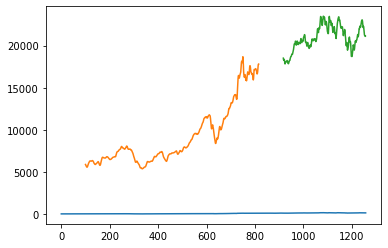

In [126]:
#graph plot

look_back =100
trainpredictplot=pdf.empty_like(data2)
trainpredictplot[:, :]=pdf.nan
trainpredictplot[look_back:len(train_predict)+look_back,  :]=train_predict

#shift test predictions for plotting
testpredictplot=pdf.empty_like(data2)
testpredictplot[:, :]=pdf.nan
testpredictplot[len(train_predict)+(look_back*2)+1:len(data2)-1, :]=test_predict

#plot of baseline and predictions
plt.plot(scaler.inverse_transform(data2))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.show()

In [127]:
len(test_data)

441

In [128]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [129]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [136]:
#Forcast for next 10 days
from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        
        x_input=pdf.array(temp_input[1:])
        print("{}day input{}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    
    else:
        x_input = x_input.reshape((1,n_steps,1))
        yhat =model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        
        
        
        
print(lst_output)

0day input[0.90124568 0.89574727 0.86431808 0.87171718 0.83044515 0.82888387
 0.87687618 0.83621509 0.83831942 0.84863743 0.89303201 0.83024151
 0.83526475 0.79977872 0.81643404 0.76198135 0.73519688 0.76612818
 0.75545518 0.78060811 0.7233682  0.69977883 0.70141037 0.73893582
 0.72024108 0.72132877 0.74349054 0.78332735 0.77788887 0.77700512
 0.79400035 0.75436749 0.75953403 0.77700512 0.77190656 0.73574072
 0.69828325 0.66259328 0.6685756  0.6867265  0.65022076 0.6604179
 0.68971766 0.68618265 0.70603307 0.7290786  0.7290786  0.70039066
 0.71255924 0.69549604 0.71051981 0.72839879 0.73764419 0.76096163
 0.76565231 0.75090046 0.75763057 0.75511528 0.77537358 0.78693033
 0.76585626 0.79257275 0.80644085 0.82214443 0.81357884 0.80582902
 0.7966516  0.83193368 0.83574061 0.87081875 0.86402066 0.85382353
 0.89542783 0.89325245 0.89168889 0.88842126 0.88876164 0.91817024
 0.91306458 0.93763982 0.94506004 0.94397083 0.9543183  0.95159528
 0.93369144 0.90680164 0.90448707 0.90652933 0.923548

In [142]:
day_new=pdf.arange(1,101)
day_predict=pdf.arange(101,131)

In [143]:
len(data2)

1258

In [144]:
data3=data2.tolist()
data3.extend(lst_output)

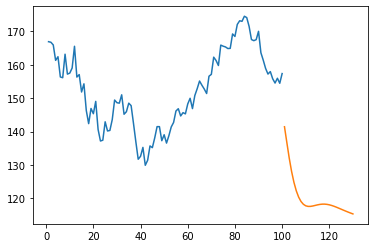

In [145]:
plt.plot(day_new,scaler.inverse_transform(data2[1158:]))
plt.plot(day_predict,scaler.inverse_transform(lst_output))